# Digit Recognition Using KNN

KNN is an algorithm used to categorize new data based off of existing data. This is possible by finding the k nearest neighbors. In this example, we will be categorizing hand written digits using KNN with a training dataset and a test dataset. An overview of how this works is that we want to find how "similar" a new piece of data is to the rest of our training dataset. This is done by comparing the pixels of each training dataset to our new piece of data to find how similar they are. In this case, we want to use Euclidean distance to find the difference in each pixel which would sum up to how similar two digits are (the lower the sum, the more similar they are and hence the more likely the new piece of data belongs in the category of the trained data). We will be computing how similar the new piece of data is to every single data in our training dataset. In the end, we should have the k elements which have the smallest (most similar) sum. This list of k elements tells us that the new piece of data are highly similar to the k elements. To categorize the new data, we will take the most common category from the top k elements.

In [44]:
# libaries to extract data from zip files and read from csv

from io import TextIOWrapper
from zipfile import ZipFile
import csv
import numpy as np

In [45]:
# extract training dataset and use numpy arrays to allow for better calculations later on

with ZipFile('train.csv.zip', 'r') as trainzipfile:
    with trainzipfile.open('train.csv') as csvfile:
        reader = csv.reader(TextIOWrapper(csvfile, 'utf-8'))
        train_label = []
        train_data = []
        reader.__next__()
        for line in reader:
            train_label.append(line[0])
            train_data.append(line[1:])
            
train_label = np.array(train_label)
train_data = np.array(train_data).astype(int)

In [46]:
# extract test dataset and use numpy arrays to allow for better calculations later on

with ZipFile('test.csv.zip', 'r') as testzipfile:
    with testzipfile.open('test.csv') as csvfile:
        reader = csv.reader(TextIOWrapper(csvfile, 'utf-8'))
        test_data = []
        reader.__next__()
        for line in reader:
            test_data.append(line)
            
test_data = np.array(test_data).astype(int)

In [47]:
# showing the labelling and actual image of training data (all labelled data is assumed to be accurate and represent the correct answer)

from PIL import Image as im

data_a = np.reshape(train_data[0], (28, 28))
img_a = im.fromarray(data_a.astype(np.uint8))

img_a.save('img_a.png')

data_b = np.reshape(train_data[123], (28, 28))
img_b = im.fromarray(data_b.astype(np.uint8))

img_b.save('img_b.png')

data_c = np.reshape(train_data[12000], (28, 28))
img_c = im.fromarray(data_c.astype(np.uint8))

img_c.save('img_c.png')

In [48]:
from IPython.display import Image
print(train_label[0])
Image(filename='img_a.png')

1


In [49]:
print(train_label[123])
Image(filename='img_b.png')

6


In [50]:
print(train_label[12000])
Image(filename='img_c.png')

7


Here we try to create our own classification model using euclidean distance and knn. It has an accuracy of 79%.

In [51]:
# define the function used to calculate how similar two images are

import math
def euclidean(a, b):
    diff = 0
    for i in range(len(a)):
        diff += math.pow(int(a[i]) - int(b[i]), 2)
    return math.sqrt(diff)

In [52]:
# heapqueue used inplace of a list for faster computation and finding top k in log time

import sys
import heapq
def knn(inp, k):
    neighbors = []
    for i in range(len(train_data)//10):
        temp = (euclidean(train_data[i], inp), train_label[i])
        heapq.heappush(neighbors, temp)
    topk = [x[1] for x in heapq.nsmallest(k, neighbors)]
    return max(topk, key=topk.count)

In [53]:
def test(inp, k):
    result = knn(test_data[inp], k)
    print(f'id: {inp + 1} result: {result}')
    return result

In [54]:
import matplotlib.pyplot as plt

with open('result.csv', 'w', newline='') as csvfile:
    headers = ["ImageId","Label"]
    w = csv.writer(csvfile)
    w.writerow(headers)
    for i in range(10):
        id = i + 1
        label = test(i, 20)
        w.writerow([id, label])

id: 1 result: 2
id: 2 result: 0
id: 3 result: 9
id: 4 result: 7
id: 5 result: 3
id: 6 result: 7
id: 7 result: 0
id: 8 result: 3
id: 9 result: 0
id: 10 result: 3


In [41]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

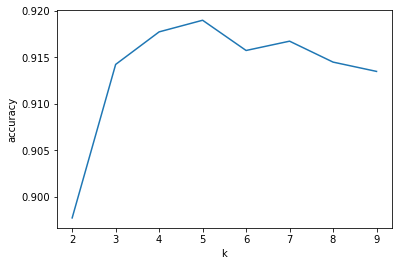

In [42]:
ks = np.arange(2, 10)
scores = []
X_train = train_data[:4000]
y_train = train_label[:4000]
for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model, X_train, y_train, cv=5)
    score.mean()
    scores.append(score.mean())

plt.plot(ks, scores)
plt.ylabel('accuracy')
plt.xlabel('k')
plt.show()

In [43]:
X_train = train_data[:4000]
y_train = train_label[:4000]
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
results = model.predict(test_data[:10])

with open('result.csv', 'w', newline='') as csvfile:
    headers = ["ImageId","Label"]
    w = csv.writer(csvfile)
    w.writerow(headers)
    for i in range(len(results)):
        id = i + 1
        label = results[i]
        w.writerow([id, label])

    